In [1]:
# Question 2
# Accuracy: A real-world example of accuracy being important is when false positives and negatives are just as dangerous, for instance, sending admission decisions, it is bad to send an acceptance to someone not accepted but also bad to not send a letter to someone who is accepted.  
# Sensitivity: Sensitivity is important in the real world when it is important to identify all positives, for example,  when diagnosing cancer, it is more dangerous to miss a diagnosis than to receive an untrue diagnosis.  
# Specificity: Specificity is important in the real world when it is important to identify true negatives, for instance, when screening a population for rare conditions. 
# Precision: A real-world example of precession being important is when avoiding a false positive is a priority, for example, identfying spam emails, false positives are signaficantly worse than false negatives. 

In [6]:
# Code for question 4
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (use the correct URL or file path)
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocessing steps
# Remove unnecessary columns
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Convert 'Pub year' and 'NumPages' to integer type, and 'Hard_or_Paper' to category type
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Now perform the 80/20 split
X = ab_reduced_noNaN[['List Price']]  # Feature
y = ab_reduced_noNaN['Hard_or_Paper']  # Target variable

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reporting the number of observations
print(f"Number of observations in the training set: {len(X_train)}")
print(f"Number of observations in the test set: {len(X_test)}")


Number of observations in the training set: 255
Number of observations in the test set: 64


In [7]:
# Question 4
# Number of observations in the training set: 255
# Number of observations in the test set: 64

Metrics for clf (List Price):
Sensitivity: 0.909, Specificity: 0.7, Accuracy: 0.844

Metrics for clf2 (NumPages, Thick, List Price):
Sensitivity: 0.909, Specificity: 0.75, Accuracy: 0.859


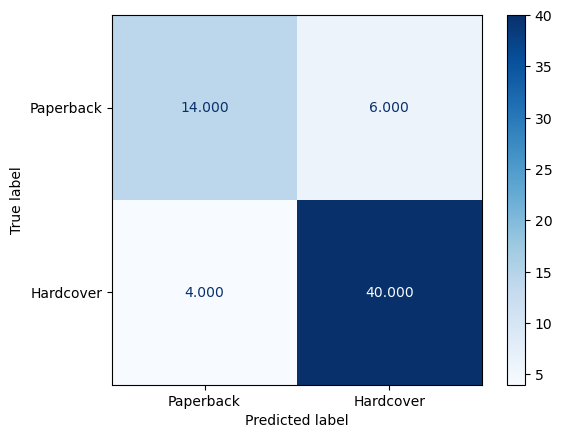

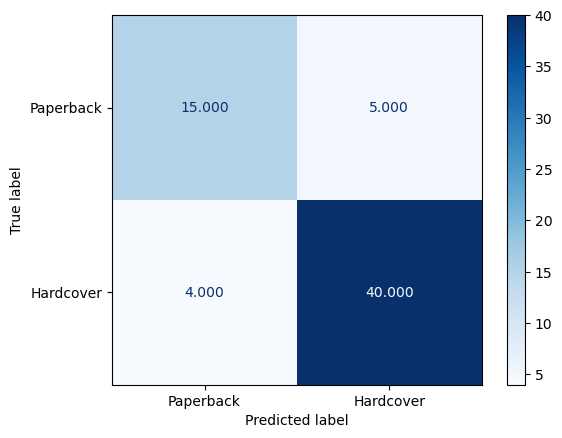

In [9]:
# Code for question 6
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you've already preprocessed the data as discussed earlier

# Define features and target for clf (List Price)
X = ab_reduced_noNaN[['List Price']]
y = ab_reduced_noNaN['Hard_or_Paper']

# Define features and target for clf2 (NumPages, Thick, List Price)
X2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y2 = ab_reduced_noNaN['Hard_or_Paper']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train the first classifier (clf) with List Price
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Train the second classifier (clf2) with NumPages, Thick, List Price
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2_train, y2_train)

# Predictions for clf and clf2
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X2_test)

# Confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y2_test, y_pred_clf2)

# Sensitivity, Specificity, and Accuracy calculations
def calculate_metrics(cm):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / cm.sum()

    return np.round(sensitivity, 3), np.round(specificity, 3), np.round(accuracy, 3)

sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# Display confusion matrices
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(cmap='Blues', values_format=".3f")

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap='Blues', values_format=".3f")

# Report metrics
print("Metrics for clf (List Price):")
print(f"Sensitivity: {sensitivity_clf}, Specificity: {specificity_clf}, Accuracy: {accuracy_clf}")

print("\nMetrics for clf2 (NumPages, Thick, List Price):")
print(f"Sensitivity: {sensitivity_clf2}, Specificity: {specificity_clf2}, Accuracy: {accuracy_clf2}")



In [10]:
# Question 6
# Metrics for clf:
# Sensitivity: 0.909, Specificity: 0.7, Accuracy: 0.844
# Metrics for clf2:
# Sensitivity: 0.909, Specificity: 0.75, Accuracy: 0.859

In [ ]:
# Question 7 
# The cause for the difference between the two confusion matrices below is the input features used to train said models.
# The first confusion matrix is developed using only the List Price feature, which leads to less predictive ability and less accuracy. 
# The second confusion matrix is developed using both NumPages and Thick features, which leads to more accurate and justifiable predictions. 
# The confusion matrices for clf and clf2 are better because they consider unseen data which leads to more generalized and realistic predictions. 

In [11]:
# Chat link: https://chatgpt.com/share/673fb8e1-6a00-8002-9d1d-889298fc0890

In [ ]:
# Chat Summary 
# Classification Decision Trees: We discussed how these trees are used for classification problems and how they differ from Multiple Linear Regression in making predictions.
# Performance Metrics: We covered key metrics like Accuracy, Sensitivity, Specificity, and Precision, explaining their use in evaluating models.
# Amazon Books Dataset: You pre-processed the data (removed columns, handled missing values, adjusted data types) and split it into training and testing sets.
# Model Training: You trained two DecisionTreeClassifier models: one using List Price and the other using NumPages, Thick, and List Price. Both were visualized using plot_tree.
# Confusion Matrices and Metrics: You calculated confusion matrices and performance metrics (sensitivity, specificity, accuracy) for both models, with clf2 performing better.
# Feature Importances: We visualized the feature importances for clf2, which highlighted the most important predictors.